In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pesummary
import os
from pesummary.io import read
#print(pesummary.__version__)
import h5py
from scipy import stats#
from pesummary.utils.samples_dict import SamplesDict
from pesummary.utils.samples_dict import Array
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [10, 7]
                                            ###MAKE NOTE OF GW190527_092055###

In [2]:
file_name = './GW190527_092055CT/GW190527_092055_comoving.h5'

In [3]:
data = read(file_name, package = 'core')
print('Found run labels:')
print(data.labels)

Found run labels:
['C01:IMRPhenomD', 'C01:IMRPhenomPv2', 'C01:NRSur7dq4', 'C01:SEOBNRv4P', 'PrecessingSpinIMR', 'PrecessingSpinIMRHM', 'PublicationSamples', 'ZeroSpinIMR']


In [4]:
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:IMRPhenomPv2']
parameters = sorted(list(posterior_samples.keys()))
print(parameters)

['H1_matched_filter_abs_snr', 'H1_matched_filter_snr', 'H1_matched_filter_snr_angle', 'H1_optimal_snr', 'H1_spcal_amp_0', 'H1_spcal_amp_1', 'H1_spcal_amp_2', 'H1_spcal_amp_3', 'H1_spcal_amp_4', 'H1_spcal_amp_5', 'H1_spcal_amp_6', 'H1_spcal_amp_7', 'H1_spcal_amp_8', 'H1_spcal_amp_9', 'H1_spcal_phase_0', 'H1_spcal_phase_1', 'H1_spcal_phase_2', 'H1_spcal_phase_3', 'H1_spcal_phase_4', 'H1_spcal_phase_5', 'H1_spcal_phase_6', 'H1_spcal_phase_7', 'H1_spcal_phase_8', 'H1_spcal_phase_9', 'H1_time', 'L1_matched_filter_abs_snr', 'L1_matched_filter_snr', 'L1_matched_filter_snr_angle', 'L1_optimal_snr', 'L1_spcal_amp_0', 'L1_spcal_amp_1', 'L1_spcal_amp_2', 'L1_spcal_amp_3', 'L1_spcal_amp_4', 'L1_spcal_amp_5', 'L1_spcal_amp_6', 'L1_spcal_amp_7', 'L1_spcal_amp_8', 'L1_spcal_amp_9', 'L1_spcal_phase_0', 'L1_spcal_phase_1', 'L1_spcal_phase_2', 'L1_spcal_phase_3', 'L1_spcal_phase_4', 'L1_spcal_phase_5', 'L1_spcal_phase_6', 'L1_spcal_phase_7', 'L1_spcal_phase_8', 'L1_spcal_phase_9', 'L1_time', 'a_1', 'a_2

In [17]:
#mtot = Array(posterior_samples['chirp_mass'])
#plt.hist(mchirp, bins = 50)
#plt.savefig('./FIGURES/GW190527_092055_fattails')

<Figure size 720x504 with 0 Axes>

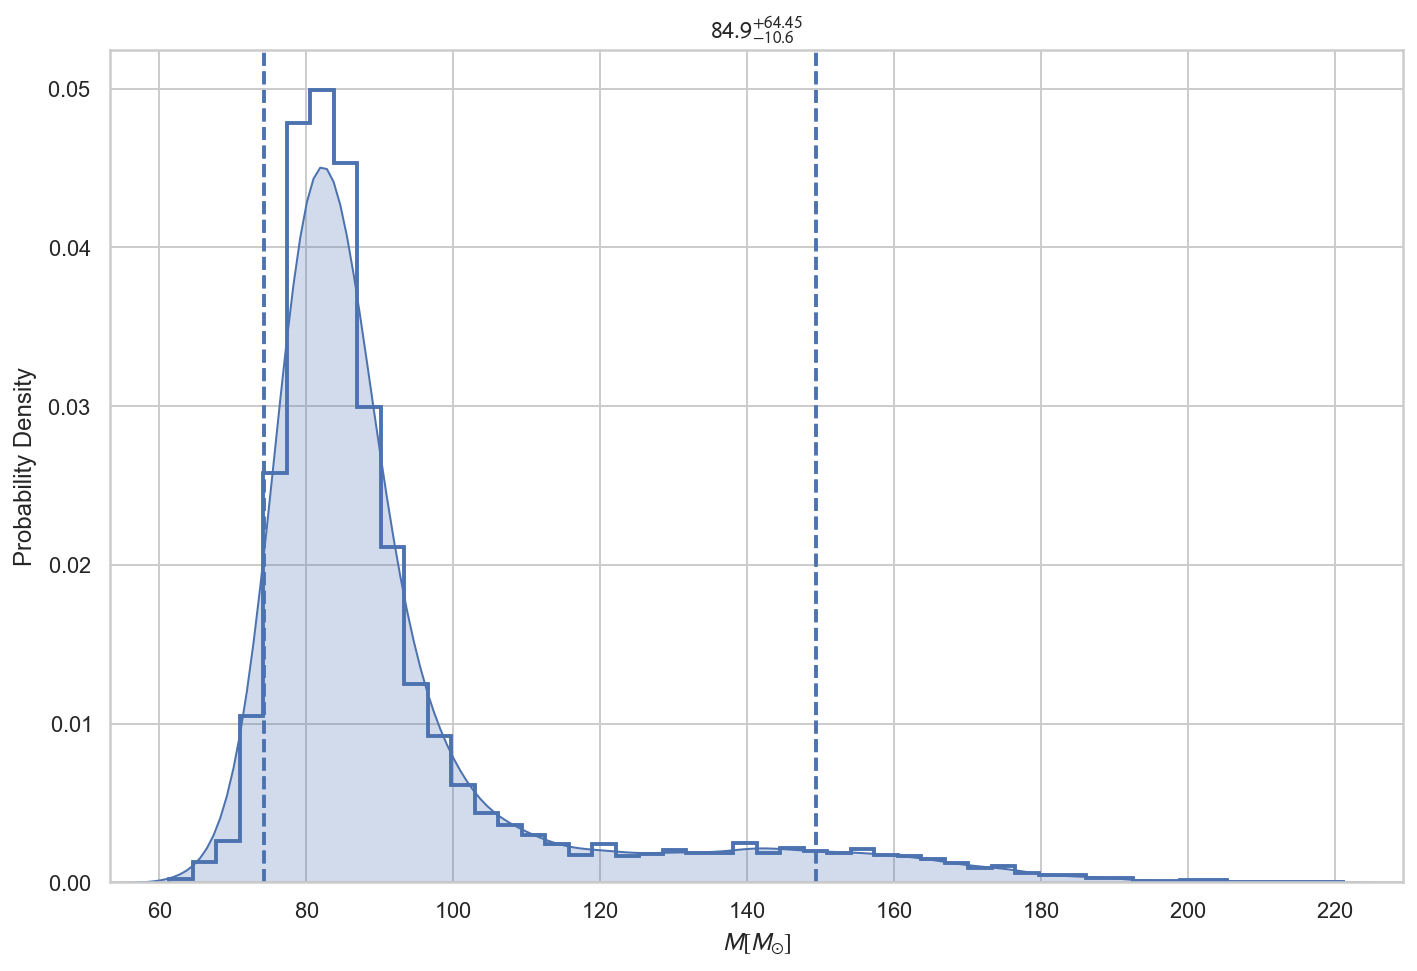

In [5]:
plt.figure(1)
fig = posterior_samples.plot('total_mass', type = 'hist')
posterior_samples.plot('total_mass', type='hist',fig=fig, kde=True)
fig.show()

In [8]:
finalpercentile = np.percentile(mtot, (5, 95))
credrange = finalpercentile[1] - finalpercentile[0]

The above cell finds the range in credible interval for whatever event is loaded into the notebook. My next step is to figure out how to isolate the final mass value (the top value on the chirp mass histogram).

In [9]:
#valuse = max(set(mchirp))
#print(valuse)
def median(lst):
    quotient, remainder = divmod(len(lst), 2)
    if remainder:
        return sorted(lst)[quotient]
    return sum(sorted(lst)[quotient - 1:quotient + 1]) / 2.
valuse = median(mtot)
print(valuse)
print(credrange)
pc = credrange / valuse * 100
print(pc)

23.35133538371658
14.10171827246463
60.38934408135853


In [10]:
file1 = open('totalvalues.txt', 'a')
file2 = open('totalpercentageinterval.txt', 'a')
file1.write(str(valuse))
file1.write('\n')
file2.write(str(pc))
file2.write('\n')
file1.close()
file2.close()

'''
plt.figure(5)
plt.plot(valuse, credrange, 'x', markersize = 5)
plt.xlabel('Mass value /solar masses')
plt.ylabel('Credible interval range')
'''

"\nplt.figure(5)\nplt.plot(valuse, credrange, 'x', markersize = 5)\nplt.xlabel('Mass value /solar masses')\nplt.ylabel('Credible interval range')\n"

The above is a 'test plot'. The code works, now it's just inputting masses and interval ranges for ALL GW events from the GWTC-2 paper